In [ ]:
import tensorflow as tf

!pip install tensorflow

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

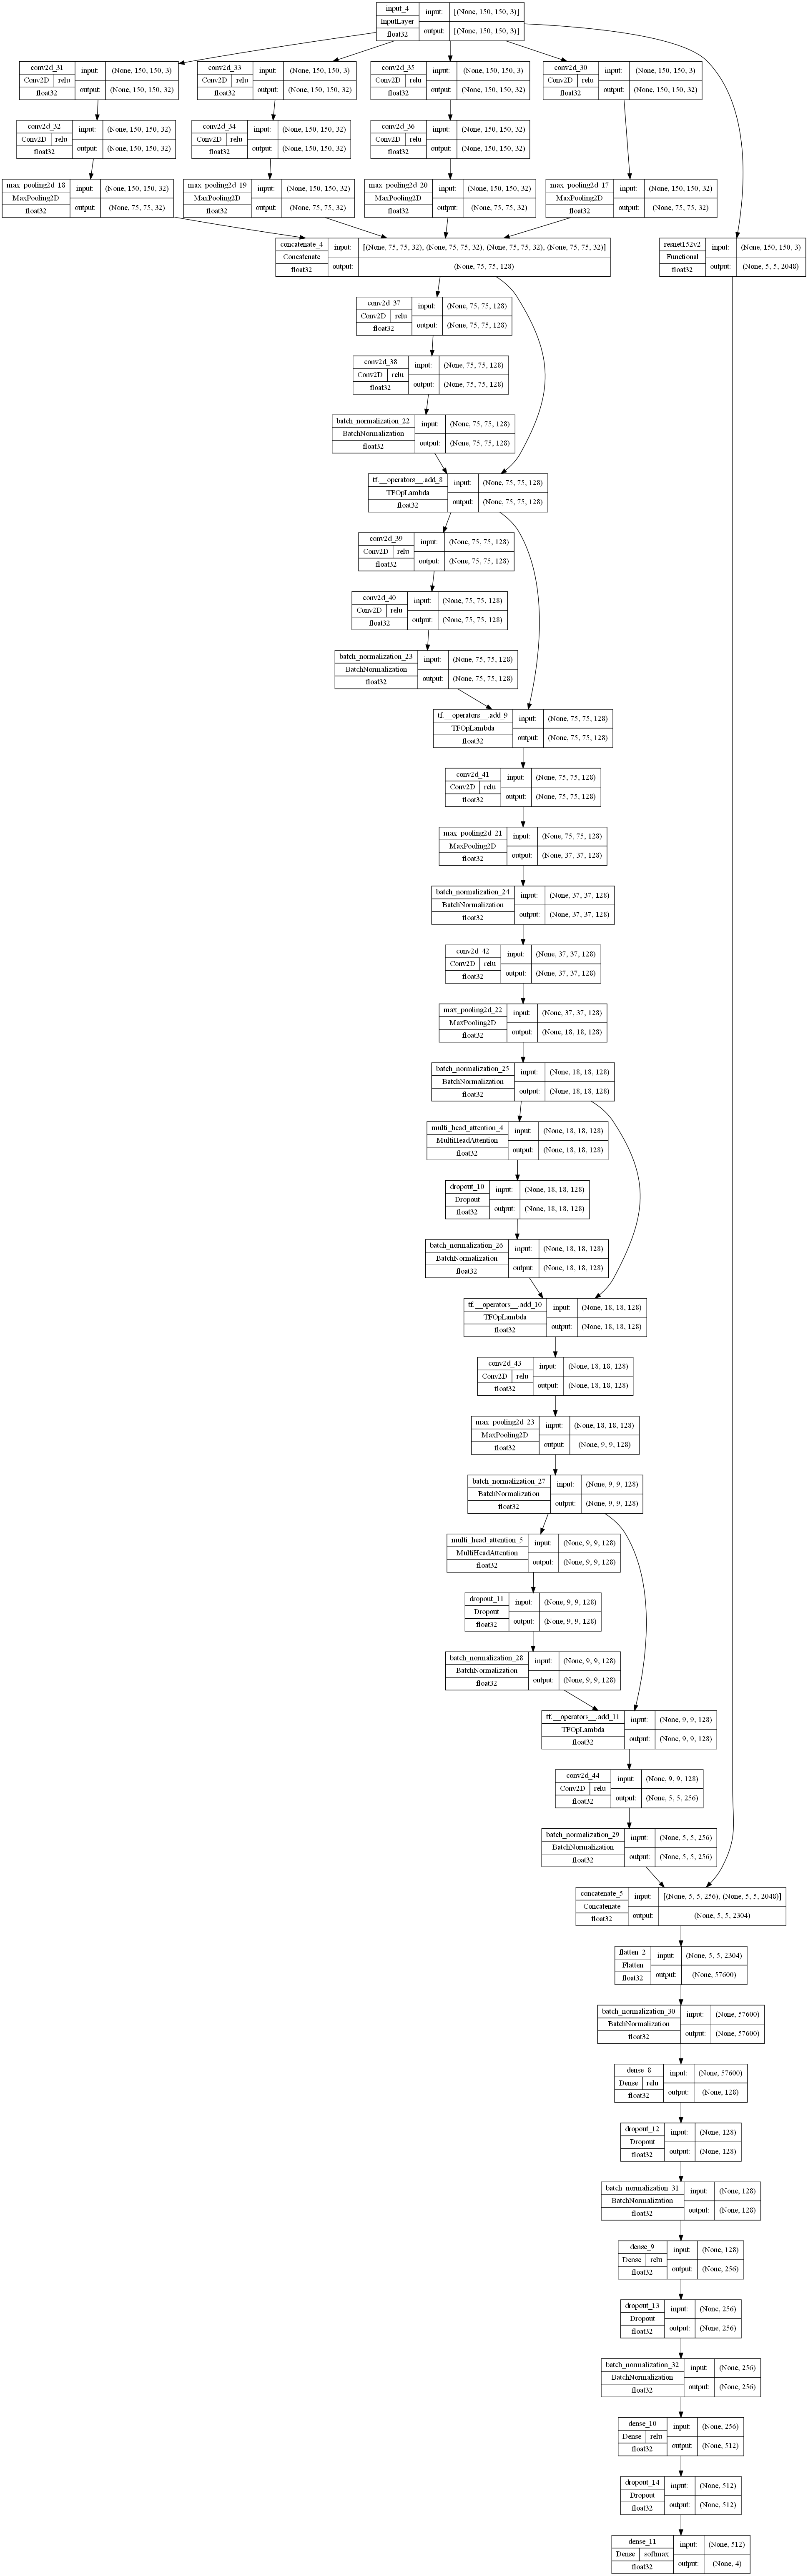

In [9]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerv2.h5")
tf.keras.utils.plot_model(model,  show_shapes=True, show_dtype=True, show_layer_activations=True,to_file= r"G:\Model.png" )


In [8]:
tf.keras.utils.plot_model?

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Test_g = ImageDataGenerator( rescale=1./255)
Test_gen = Test_g.flow_from_directory("G:\MSc project\Dataset 3\Testing",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                            batch_size= 32
                                       )
# model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerv2.h5")

# model.evaluate(Test_gen)

Found 1311 images belonging to 4 classes.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_g = ImageDataGenerator( rescale=1./255,rotation_range= 10, 
                             validation_split = 0.15,     
                             horizontal_flip=True, vertical_flip = True)
train_gen = train_g.flow_from_directory("G:\MSc project\Dataset 3\Training",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                                        subset = "training",
                            batch_size= 32
                                       )

valid_gen = train_g.flow_from_directory("G:\MSc project\Dataset 3\Training",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                                        subset = "validation",
                            batch_size= 32
                                       )
Test_g = ImageDataGenerator( rescale=1./255)
Test_gen = Test_g.flow_from_directory("G:\MSc project\Dataset 3\Testing",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                            batch_size= 32
                                       )

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [3]:
import tensorflow as tf

basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False

input_1
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_pre

In [14]:
import tensorflow as tf
# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1_1 = layers.Dense(256, activation = 'relu')(out_layers)
out_layers1_1 = layers.Dropout(0.4)(out_layers1_1)
out_layers1_1 = layers.BatchNormalization()(out_layers1_1)

out_layers1_2 = layers.Dense(256, activation = 'relu')(out_layers1_1)
out_layers1_2 = layers.Dropout(0.4)(out_layers1_2)
out_layers1_2 = layers.BatchNormalization()(out_layers1_2)




out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1_2)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers1 = out_layers1+out_layers1_1

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)



In [15]:
maze.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 150, 150, 32  128         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 150, 150, 32  128         ['input_4[0][0]']                
                                )                                                           

                                                                                                  
 multi_head_attention_2 (MultiH  (None, 18, 18, 128)  263808     ['batch_normalization_14[0][0]', 
 eadAttention)                                                    'batch_normalization_14[0][0]'] 
                                                                                                  
 dropout_5 (Dropout)            (None, 18, 18, 128)  0           ['multi_head_attention_2[0][0]'] 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 18, 18, 128)  512        ['dropout_5[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_7 (TFOpLa  (None, 18, 18, 128)  0          ['batch_normalization_15[0][0]', 
 mbda)    

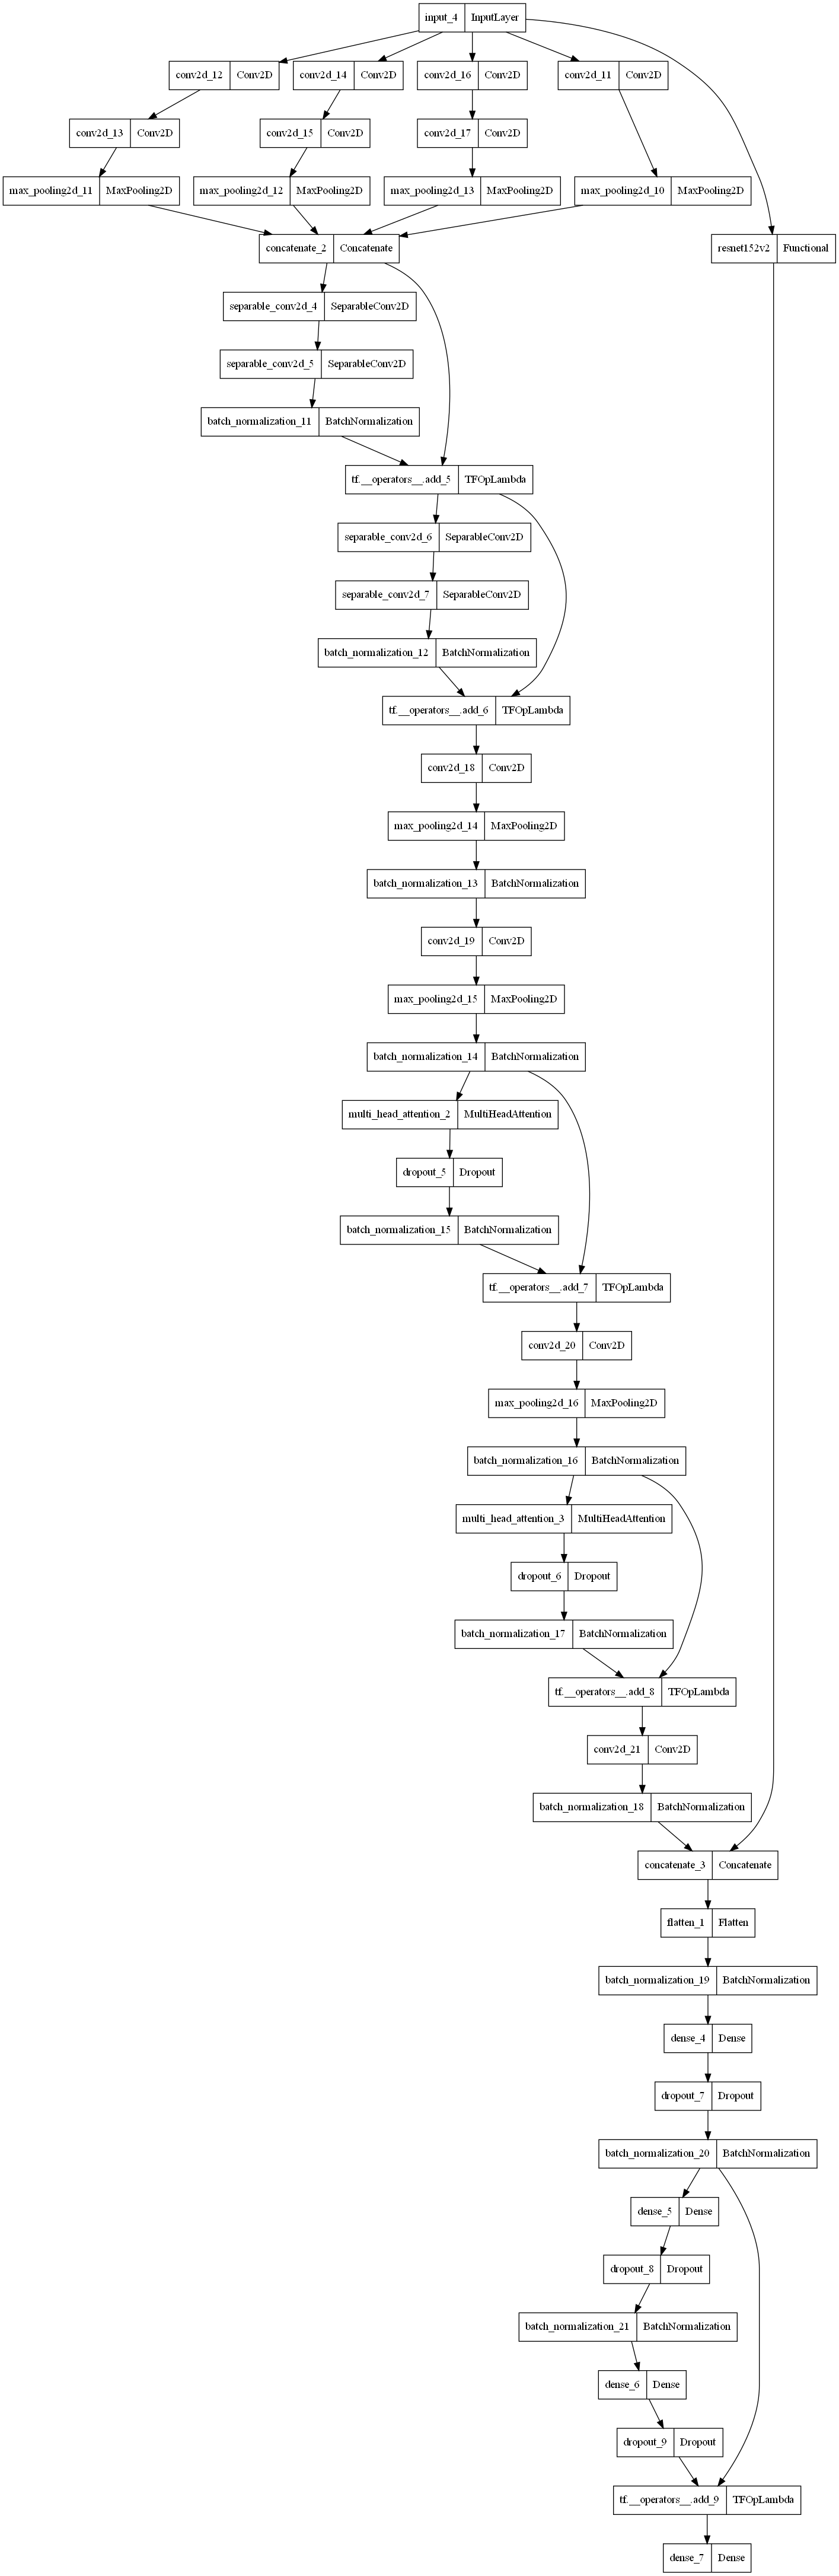

In [16]:
tf.keras.utils.plot_model(maze)

In [17]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayerseperable+resv2.h5",save_best_only=True,verbose = 1)

In [18]:
history = maze.fit(
train_gen,
epochs=30,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/30
152/152 [==============================] - ETA: 0s - loss: 0.5334 - accuracy: 0.8279 
Epoch 1: val_loss improved from inf to 1.91907, saving model to G:\MSc project\Mazemorelayerseperable+resv2.h5
152/152 [==============================] - 1660s 11s/step - loss: 0.5334 - accuracy: 0.8279 - val_loss: 1.9191 - val_accuracy: 0.7836
Epoch 2/30
152/152 [==============================] - ETA: 0s - loss: 0.3340 - accuracy: 0.8888 
Epoch 2: val_loss improved from 1.91907 to 0.96906, saving model to G:\MSc project\Mazemorelayerseperable+resv2.h5
152/152 [==============================] - 1775s 12s/step - loss: 0.3340 - accuracy: 0.8888 - val_loss: 0.9691 - val_accuracy: 0.8327
Epoch 3/30
152/152 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9214 
Epoch 3: val_loss improved from 0.96906 to 0.66504, saving model to G:\MSc project\Mazemorelayerseperable+resv2.h5
152/152 [==============================] - 1623s 11s/step - loss: 0.2306 - accuracy: 0.9214 - val_lo

152/152 [==============================] - 1567s 10s/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.3422 - val_accuracy: 0.9485
Epoch 29/30
152/152 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9868
Epoch 29: val_loss did not improve from 0.24954
152/152 [==============================] - 1572s 10s/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.5889 - val_accuracy: 0.9368
Epoch 30/30
152/152 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9903
Epoch 30: val_loss did not improve from 0.24954
152/152 [==============================] - 1573s 10s/step - loss: 0.0381 - accuracy: 0.9903 - val_loss: 0.2769 - val_accuracy: 0.9520


In [23]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+resv2.h5")
# maze.evaluate(Test_gen)

In [24]:
model.evaluate(Test_gen)

41/41 [==============================] - 141s 3s/step - loss: 0.1528 - accuracy: 0.9664


[0.15275926887989044, 0.966437816619873]

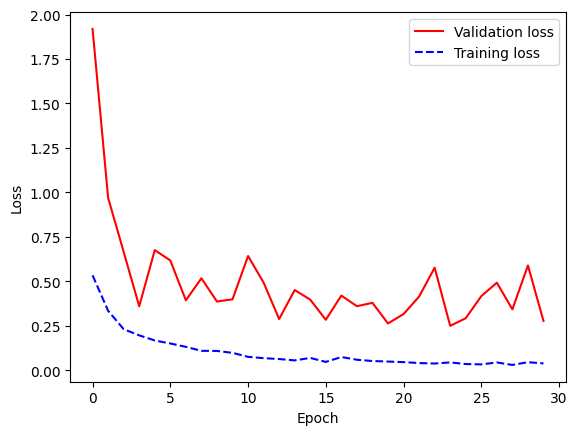

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

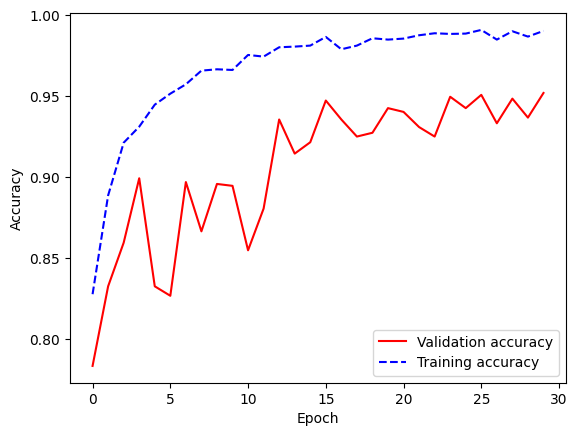

In [26]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [29]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res.h5")


In [30]:
model.evaluate(Test_gen)

41/41 [==============================] - 137s 3s/step - loss: 0.1988 - accuracy: 0.9367


[0.1987679898738861, 0.936689555644989]

In [31]:
maze.evaluate(Test_gen)

41/41 [==============================] - 145s 4s/step - loss: 0.1373 - accuracy: 0.9680


[0.13733915984630585, 0.9679633975028992]

In [1]:
import tensorflow as tf


import tensorflow as tf

basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False


# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1_1 = layers.Dense(256, activation = 'relu')(out_layers)
out_layers1_1 = layers.Dropout(0.4)(out_layers1_1)
out_layers1_1 = layers.BatchNormalization()(out_layers1_1)

out_layers1_2 = layers.Dense(256, activation = 'relu')(out_layers1_1)
out_layers1_2 = layers.Dropout(0.4)(out_layers1_2)
out_layers1_2 = layers.BatchNormalization()(out_layers1_2)




out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1_2)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers1 = out_layers1+out_layers1_1

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)



input_1
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_pre

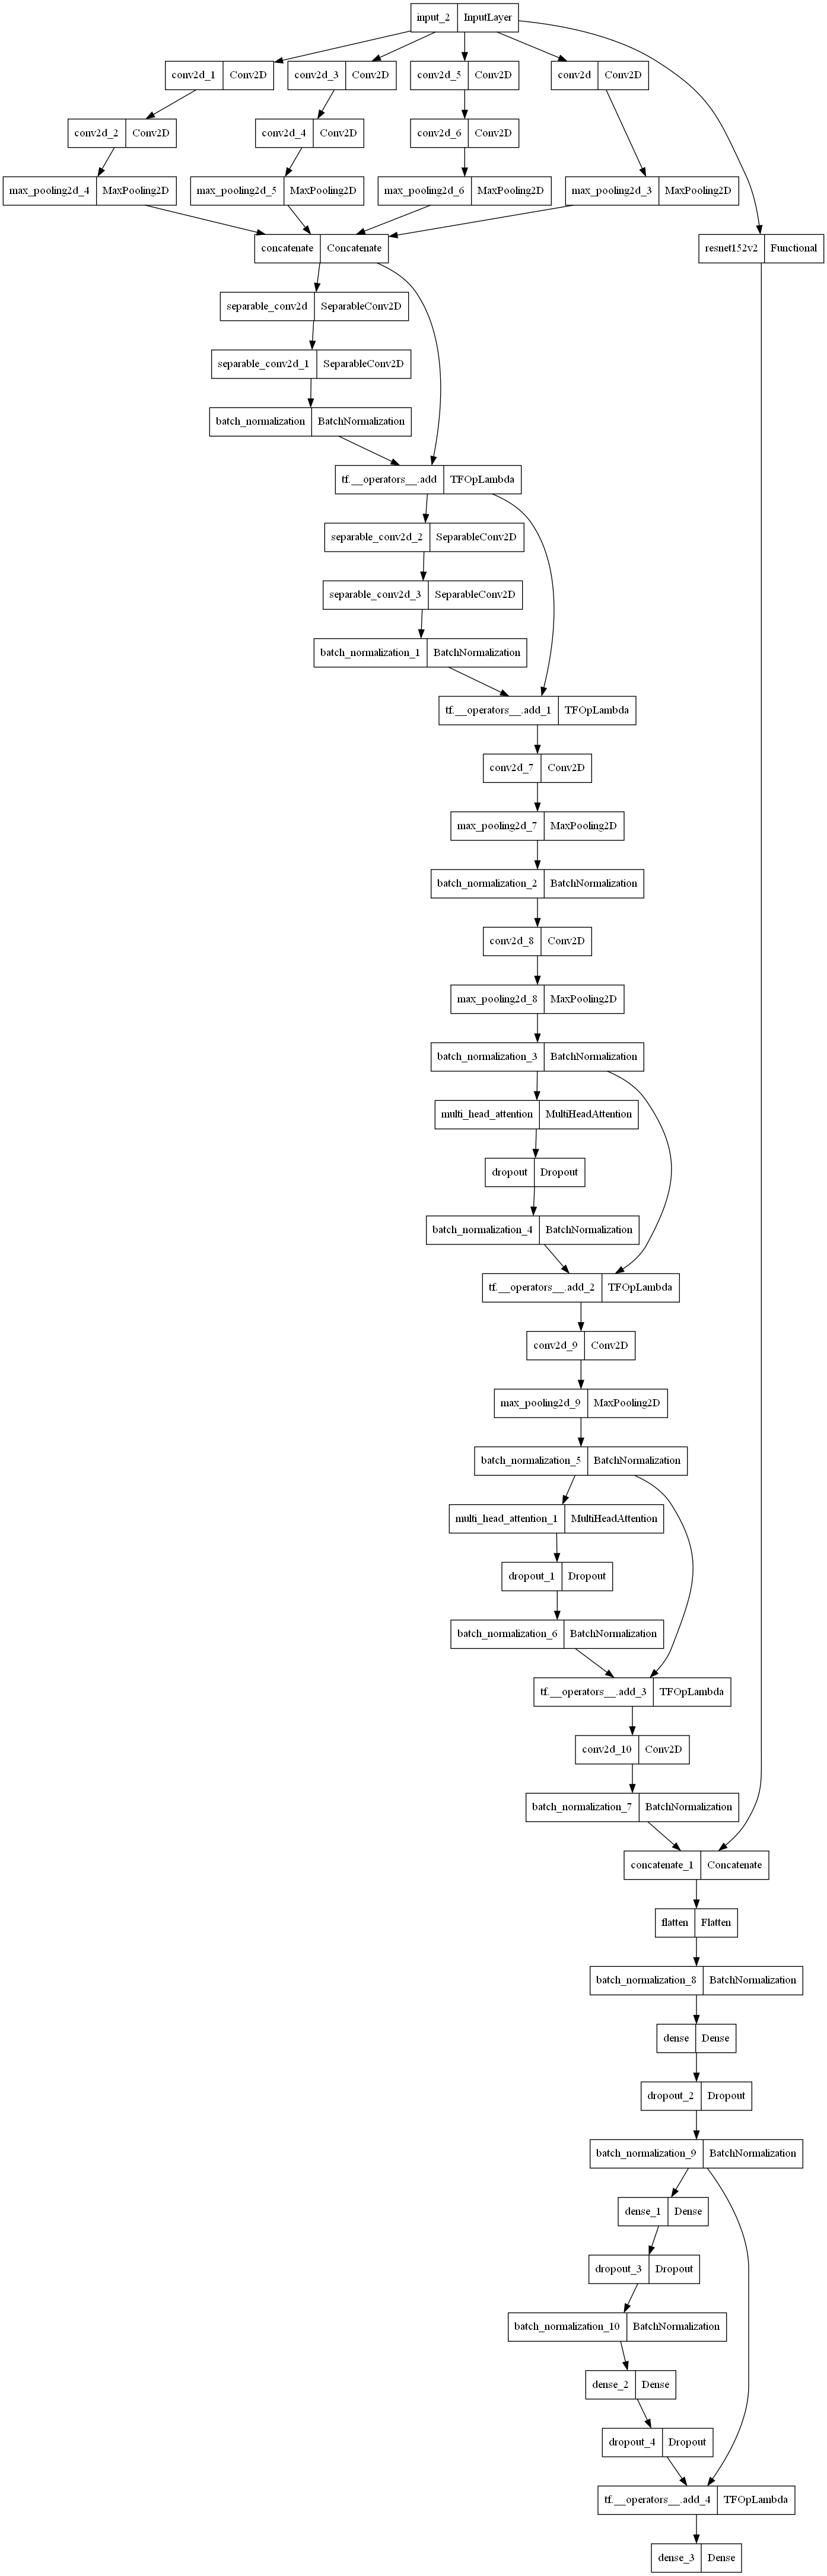

In [2]:
tf.keras.utils.plot_model(maze)

In [4]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5",save_best_only=True,verbose = 1)

In [5]:
history = maze.fit(
train_gen,
epochs=20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.8032
Epoch 1: val_loss improved from inf to 2.73902, saving model to G:\MSc project\Mazemorelayerseperable+res20ep.h5
152/152 [==============================] - 212s 1s/step - loss: 0.6189 - accuracy: 0.8032 - val_loss: 2.7390 - val_accuracy: 0.7018
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8814
Epoch 2: val_loss improved from 2.73902 to 0.89603, saving model to G:\MSc project\Mazemorelayerseperable+res20ep.h5
152/152 [==============================] - 119s 785ms/step - loss: 0.3584 - accuracy: 0.8814 - val_loss: 0.8960 - val_accuracy: 0.8152
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.9074
Epoch 3: val_loss did not improve from 0.89603
152/152 [==============================] - 114s 746ms/step - loss: 0.2605 - accuracy: 0.9074 - val_loss: 0.9512 - val_accuracy: 0.8129
Epoch 4/20
152/152 [=============

In [7]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5")
model.evaluate(Test_gen)

41/41 [==============================] - 25s 535ms/step - loss: 0.1764 - accuracy: 0.9680


[0.17638257145881653, 0.9679633975028992]

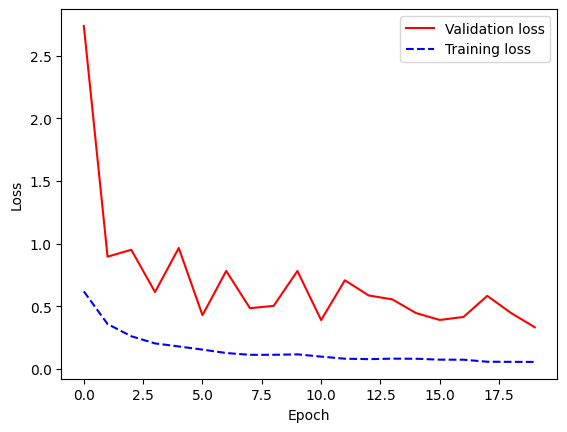

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

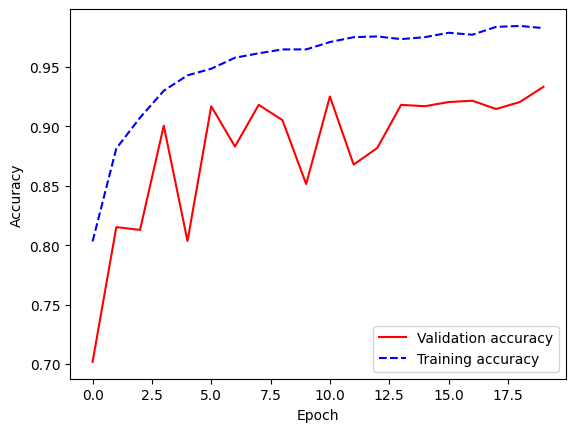

In [14]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Parameters increases

In [3]:
import tensorflow as tf


import tensorflow as tf

basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False


# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.SeparableConv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.SeparableConv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1_1 = layers.Dense(256, activation = 'relu')(out_layers)
out_layers1_1 = layers.Dropout(0.4)(out_layers1_1)
out_layers1_1 = layers.BatchNormalization()(out_layers1_1)

out_layers1_2 = layers.Dense(256, activation = 'relu')(out_layers1_1)
out_layers1_2 = layers.Dropout(0.4)(out_layers1_2)
out_layers1_2 = layers.BatchNormalization()(out_layers1_2)




out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1_2)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers1 = out_layers1+out_layers1_1

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)



input_1
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_pre

In [4]:
maze.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 150, 150, 32  128         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 150, 150, 32  128         ['input_2[0][0]']                
                                )                                                             

 batch_normalization_4 (BatchNo  (None, 18, 18, 128)  512        ['dropout[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 tf.__operators__.add_2 (TFOpLa  (None, 18, 18, 128)  0          ['batch_normalization_4[0][0]',  
 mbda)                                                            'batch_normalization_3[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 18, 18, 128)  409728      ['tf.__operators__.add_2[0][0]'] 
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 9, 9, 128)   0           ['conv2d_9[0][0]']               
                                                                                                  
 batch_nor

In [5]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayerseperable+res30ep.h5",save_best_only=True,verbose = 1)

In [6]:
history = maze.fit(
train_gen,
epochs=40,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/40
152/152 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.8036
Epoch 1: val_loss improved from inf to 4.87579, saving model to G:\MSc project\Mazemorelayerseperable+res30ep.h5
152/152 [==============================] - 154s 863ms/step - loss: 0.5949 - accuracy: 0.8036 - val_loss: 4.8758 - val_accuracy: 0.6538
Epoch 2/40
152/152 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8742
Epoch 2: val_loss improved from 4.87579 to 1.54972, saving model to G:\MSc project\Mazemorelayerseperable+res30ep.h5
152/152 [==============================] - 122s 805ms/step - loss: 0.3688 - accuracy: 0.8742 - val_loss: 1.5497 - val_accuracy: 0.7825
Epoch 3/40
152/152 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.9067
Epoch 3: val_loss improved from 1.54972 to 0.84672, saving model to G:\MSc project\Mazemorelayerseperable+res30ep.h5
152/152 [==============================] - 124s 817ms/step - loss: 0.2622 - accuracy: 0.9067 - 

Epoch 28/40
152/152 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9885
Epoch 28: val_loss did not improve from 0.30750
152/152 [==============================] - 116s 761ms/step - loss: 0.0472 - accuracy: 0.9885 - val_loss: 0.4711 - val_accuracy: 0.9333
Epoch 29/40
152/152 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9862
Epoch 29: val_loss did not improve from 0.30750
152/152 [==============================] - 116s 761ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.7580 - val_accuracy: 0.9041
Epoch 30/40
152/152 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9876
Epoch 30: val_loss did not improve from 0.30750
152/152 [==============================] - 116s 761ms/step - loss: 0.0440 - accuracy: 0.9876 - val_loss: 0.6715 - val_accuracy: 0.9240
Epoch 31/40
152/152 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9874
Epoch 31: val_loss improved from 0.30750 to 0.23577, saving mod

In [7]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res30ep.h5")
model.evaluate(Test_gen)

41/41 [==============================] - 20s 394ms/step - loss: 0.1461 - accuracy: 0.9672


[0.14613847434520721, 0.9672006368637085]

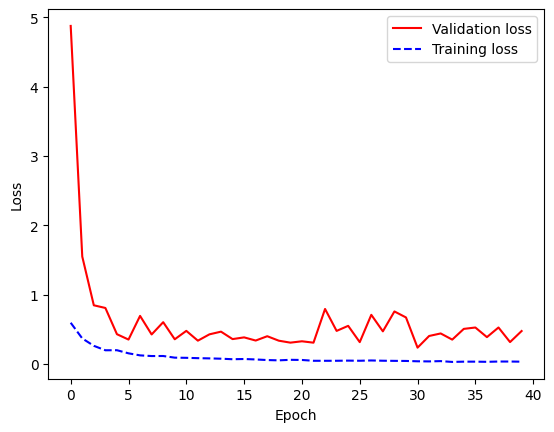

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

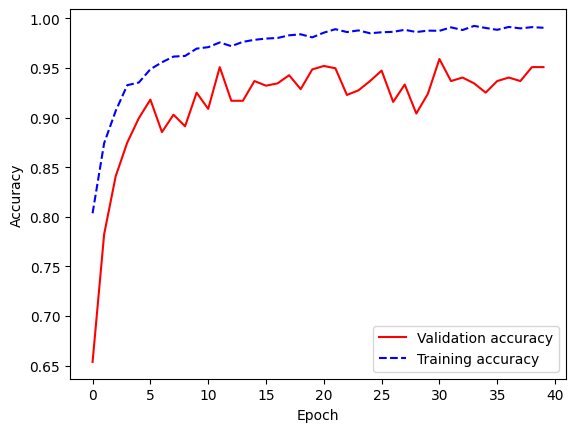

In [9]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
maze.evaluate(Test_gen)

41/41 [==============================] - 14s 341ms/step - loss: 0.1787 - accuracy: 0.9634


[0.1787424385547638, 0.9633867144584656]